In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

In [3]:
def clean_date(date):
    return date.replace('T', '').replace('000000', '')

In [4]:
data['date'] = data['date'].apply(clean_date)

In [5]:
data.head()

id      date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  20141013  221900.0         3       1.00         1180      5650   
1  6414100192  20141209  538000.0         3       2.25         2570      7242   
2  5631500400  20150225  180000.0         2       1.00          770     10000   
3  2487200875  20141209  604000.0         4       3.00         1960      5000   
4  1954400510  20150218  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [11]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [12]:
data['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [13]:
data['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [14]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [15]:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [16]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [17]:
data['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

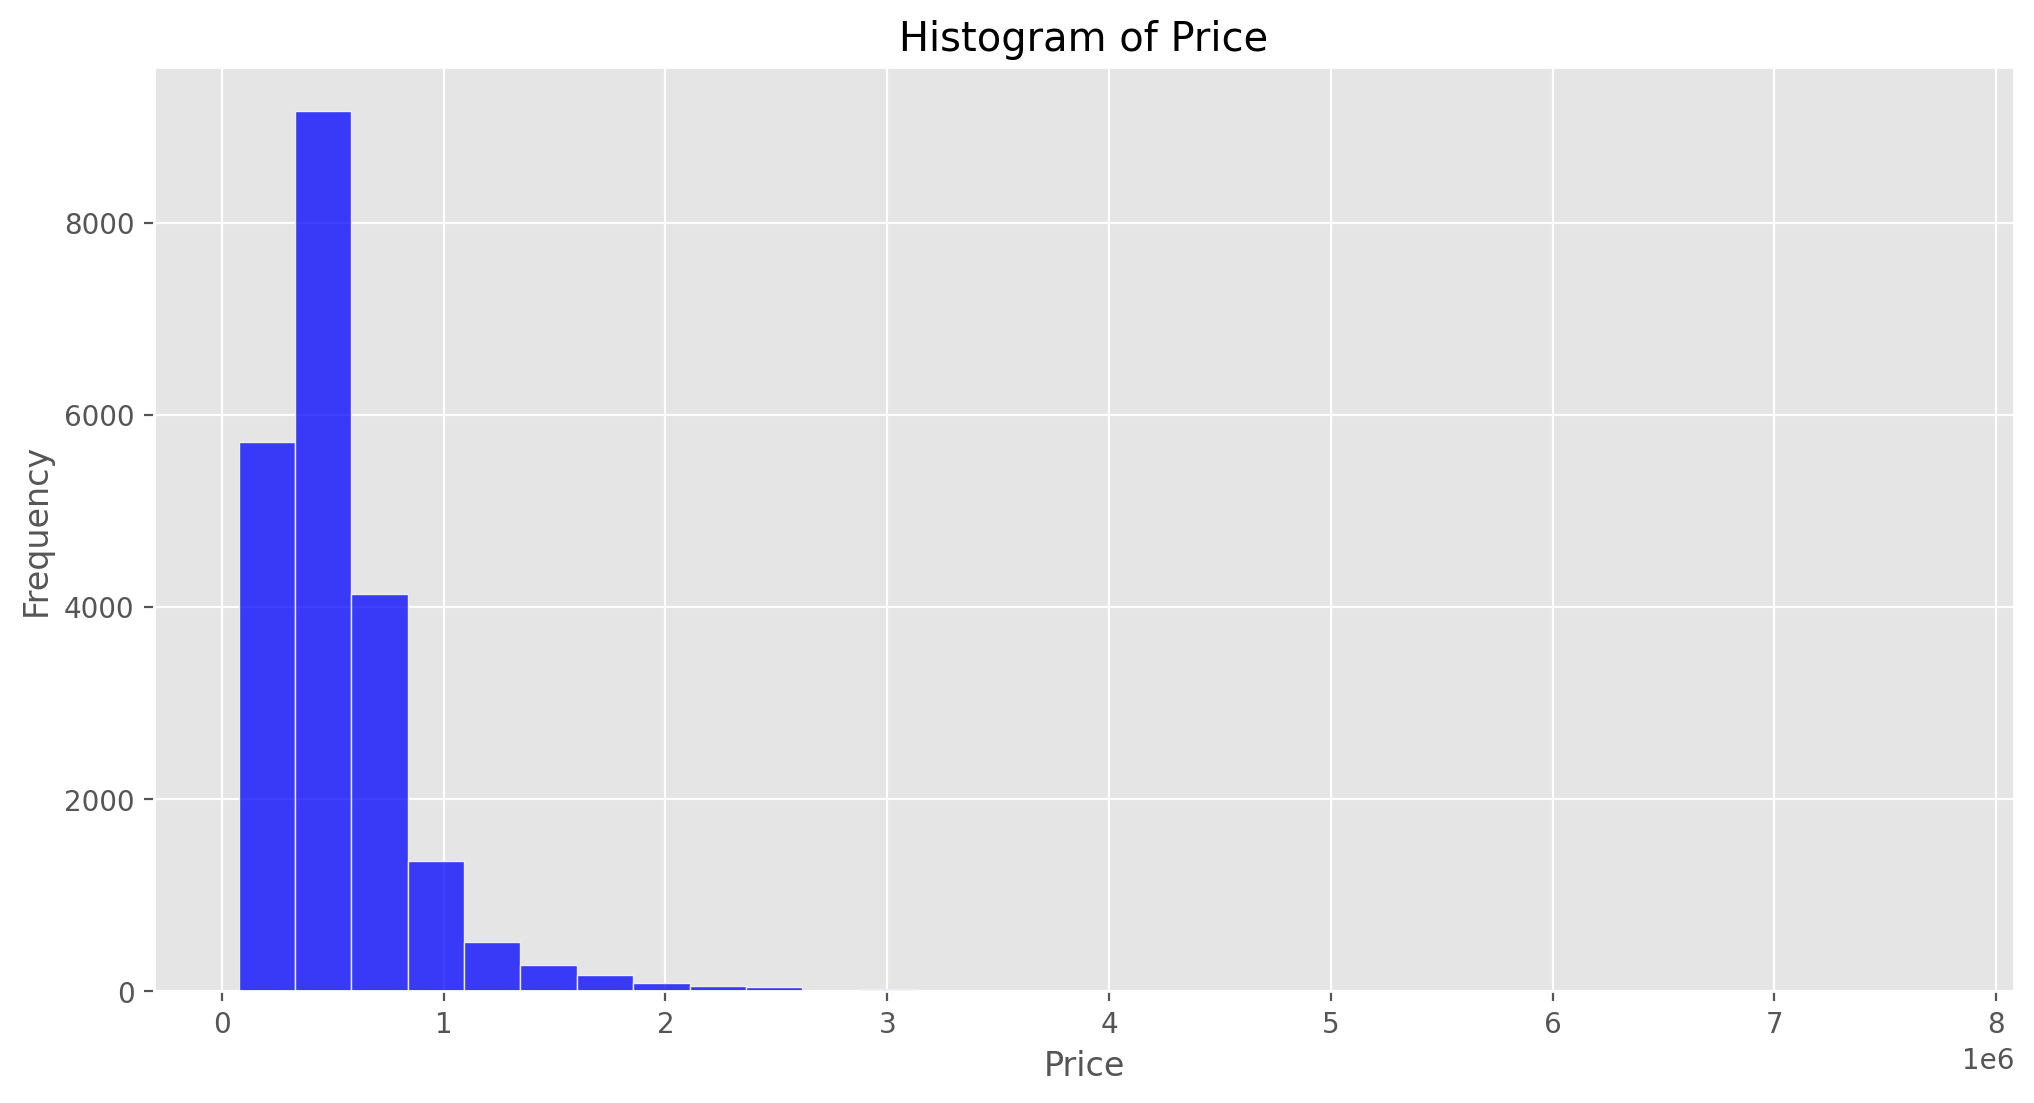

In [18]:
plt.figure(figsize=(12, 6), dpi=200)

# Create a histogram using sns.histplot
sns.histplot(x='price', data=data, bins=30, kde=False, color='blue')

plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

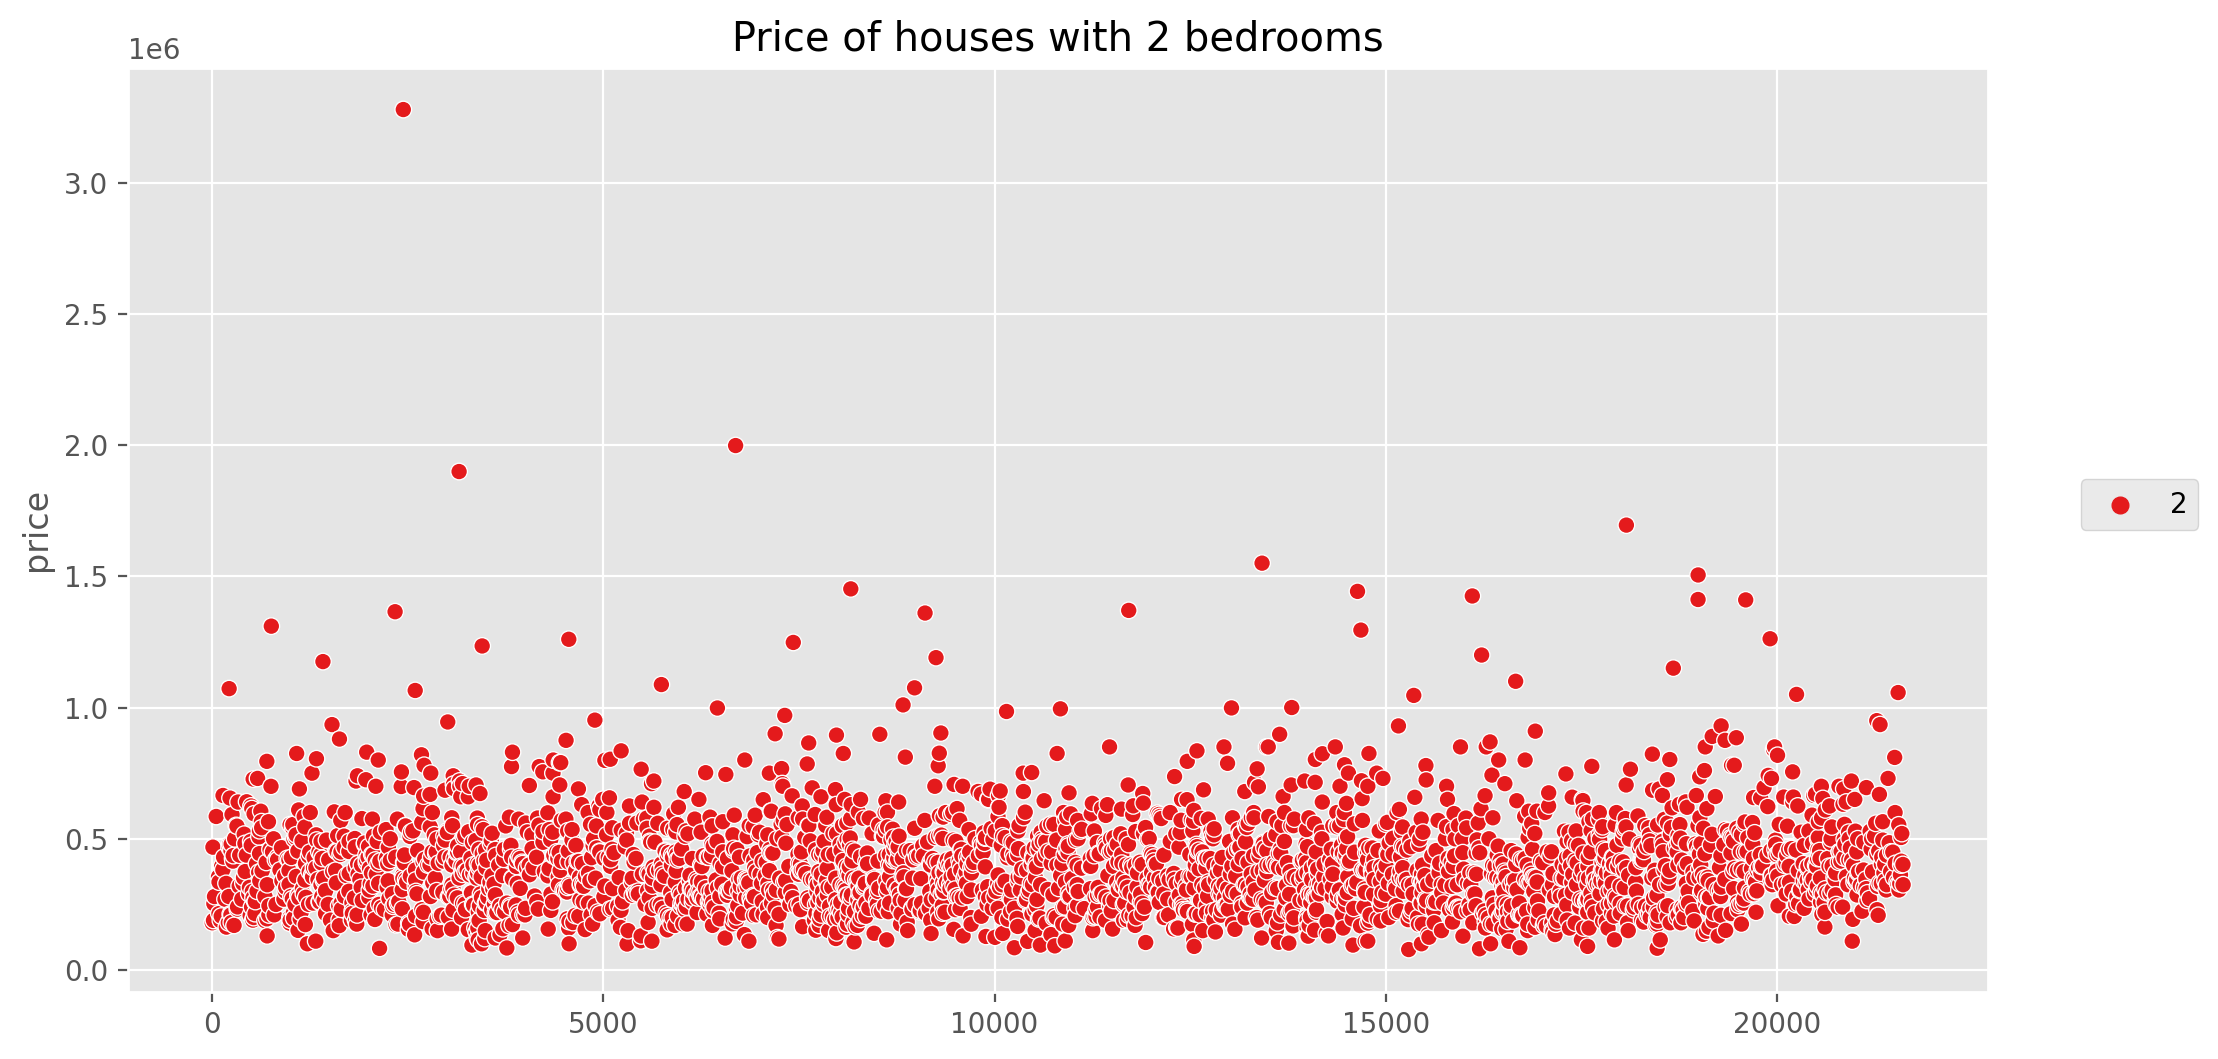

In [19]:
filtered_data = data[data['bedrooms'] == 2]

plt.figure(figsize=(12, 6), dpi=200)

# Scatterplot
sns.scatterplot(x=filtered_data.index, y=filtered_data['price'], hue=filtered_data['bedrooms'], palette='Set1')
plt.title('Price of houses with 2 bedrooms')
plt.legend(loc=(1.05, 0.5))

plt.show()

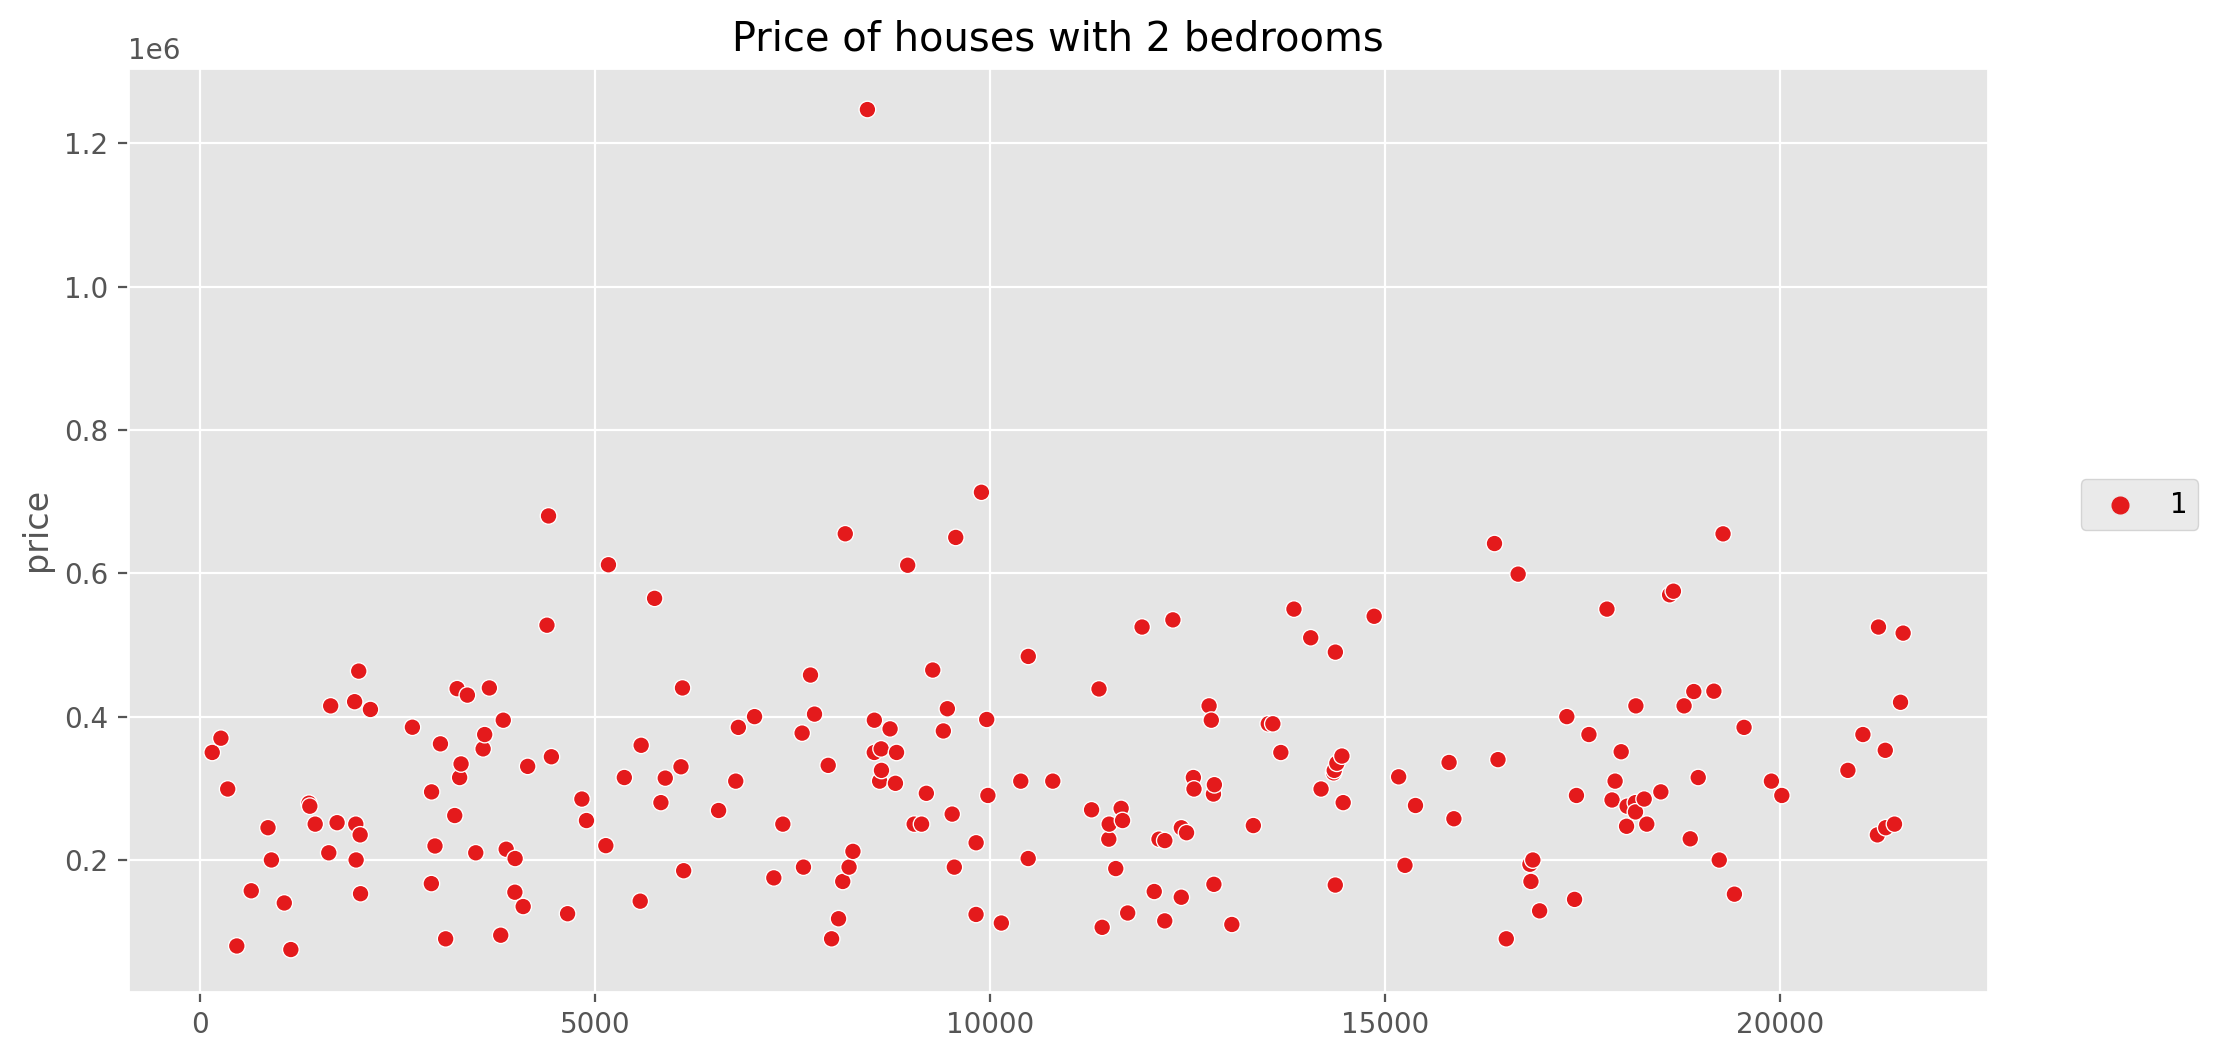

In [20]:
filtered_data = data[data['bedrooms'] == 1]

plt.figure(figsize=(12, 6), dpi=200)

# Scatterplot
sns.scatterplot(x=filtered_data.index, y=filtered_data['price'], hue=filtered_data['bedrooms'], palette='Set1')
plt.title('Price of houses with 2 bedrooms')
plt.legend(loc=(1.05, 0.5))

plt.show()

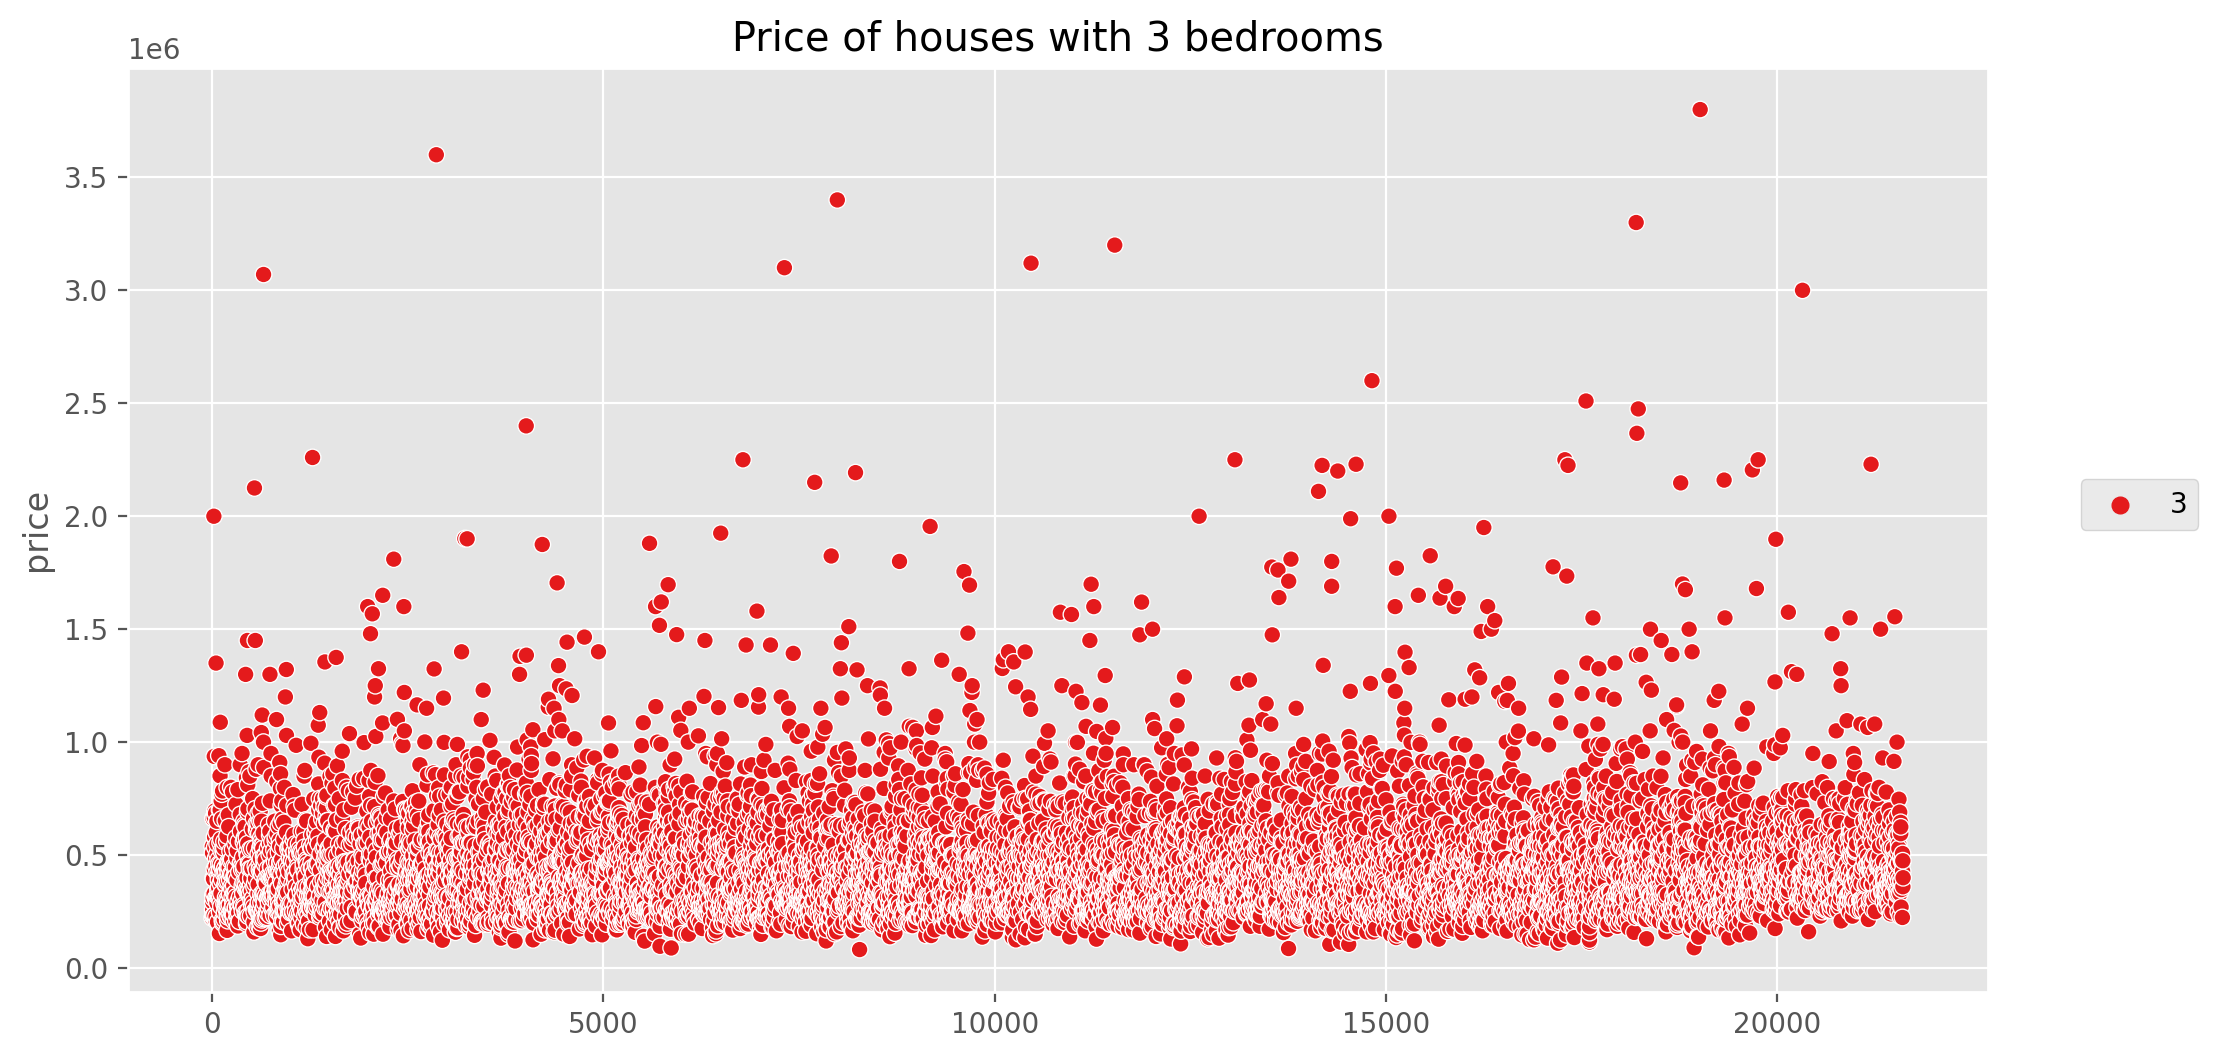

In [21]:
filtered_data = data[data['bedrooms'] == 3]

plt.figure(figsize=(12, 6), dpi=200)

# Scatterplot
sns.scatterplot(x=filtered_data.index, y=filtered_data['price'], hue=filtered_data['bedrooms'], palette='Set1')
plt.title('Price of houses with 3 bedrooms')
plt.legend(loc=(1.05, 0.5))

plt.show()

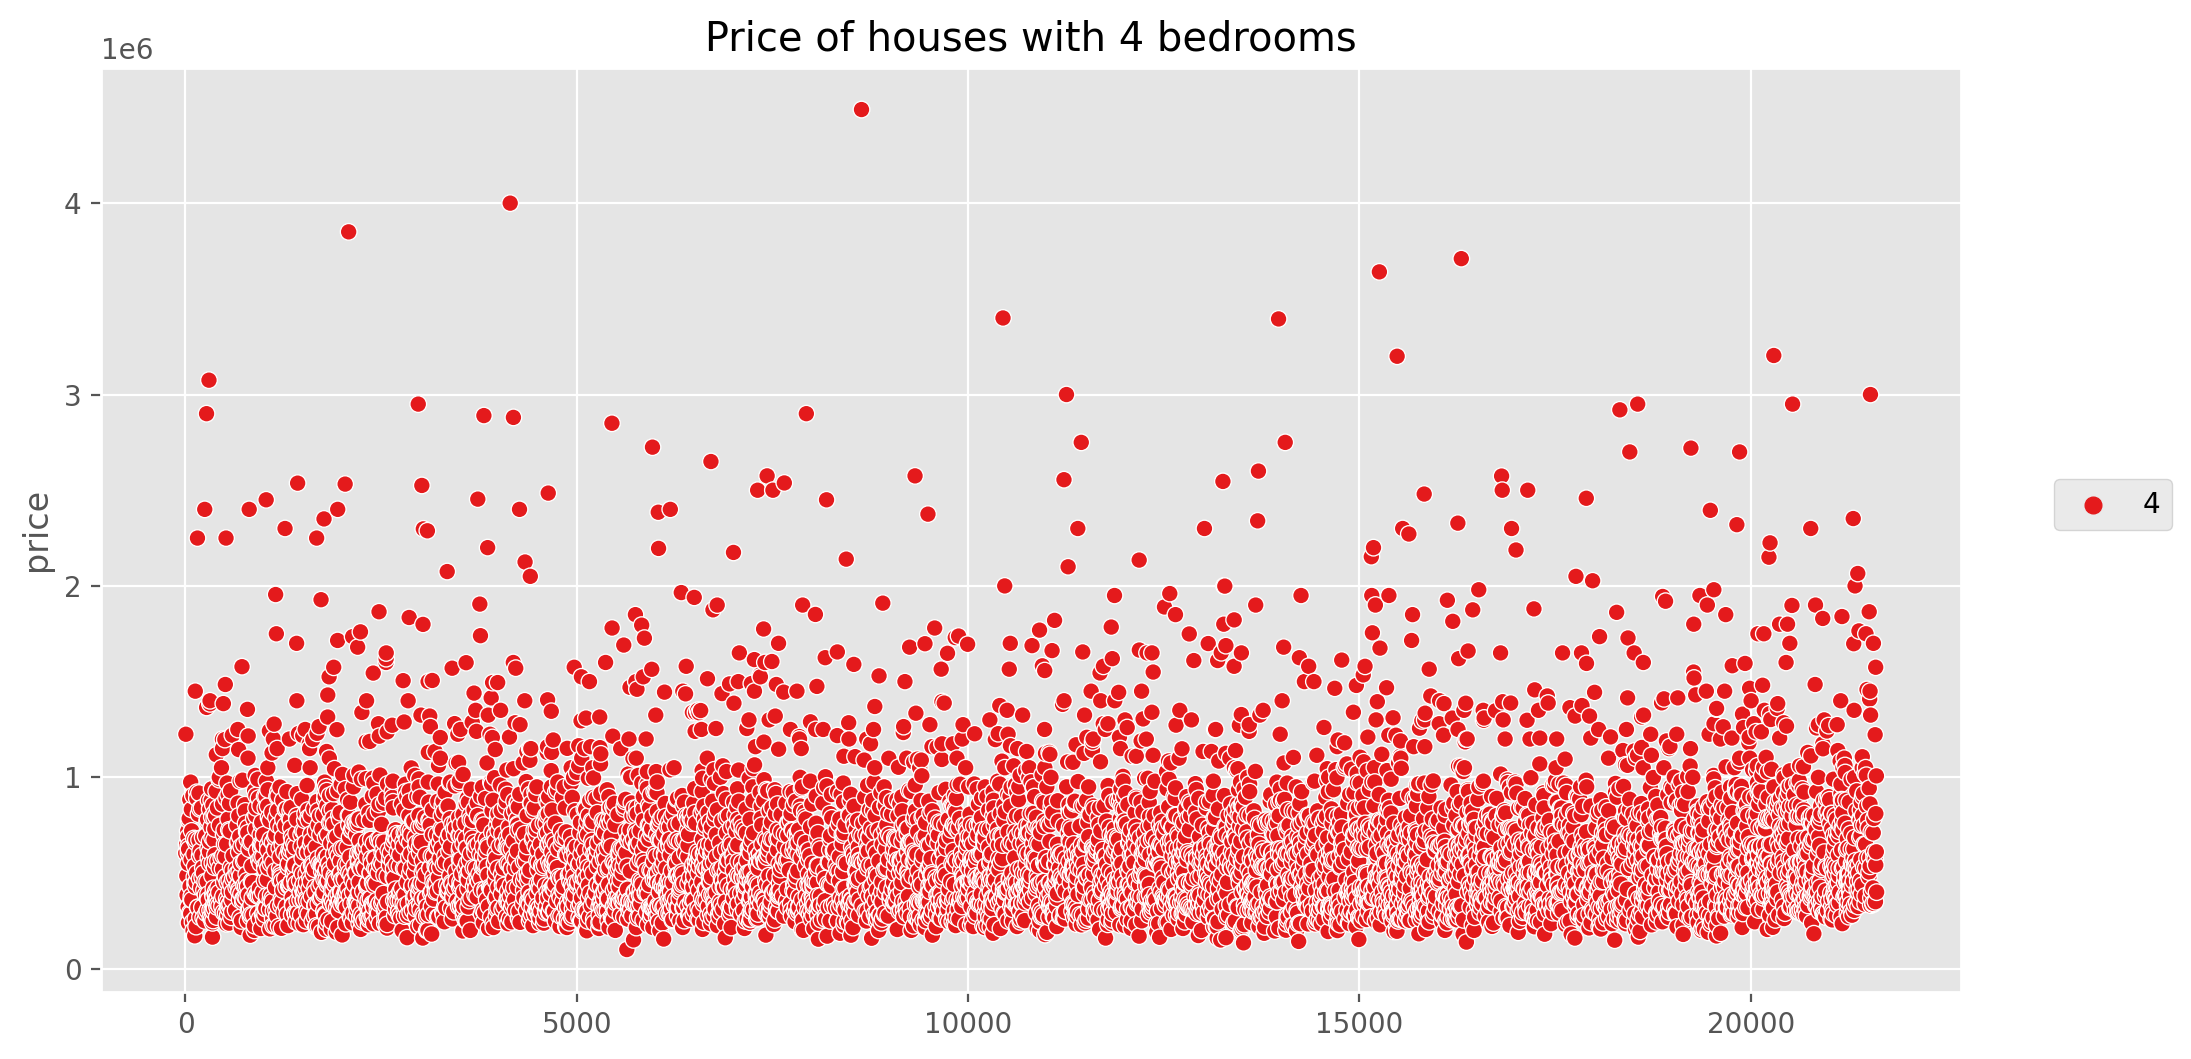

In [22]:
filtered_data = data[data['bedrooms'] == 4]

plt.figure(figsize=(12, 6), dpi=200)

# Scatterplot
sns.scatterplot(x=filtered_data.index, y=filtered_data['price'], hue=filtered_data['bedrooms'], palette='Set1')
plt.title('Price of houses with 4 bedrooms')
plt.legend(loc=(1.05, 0.5))

plt.show()

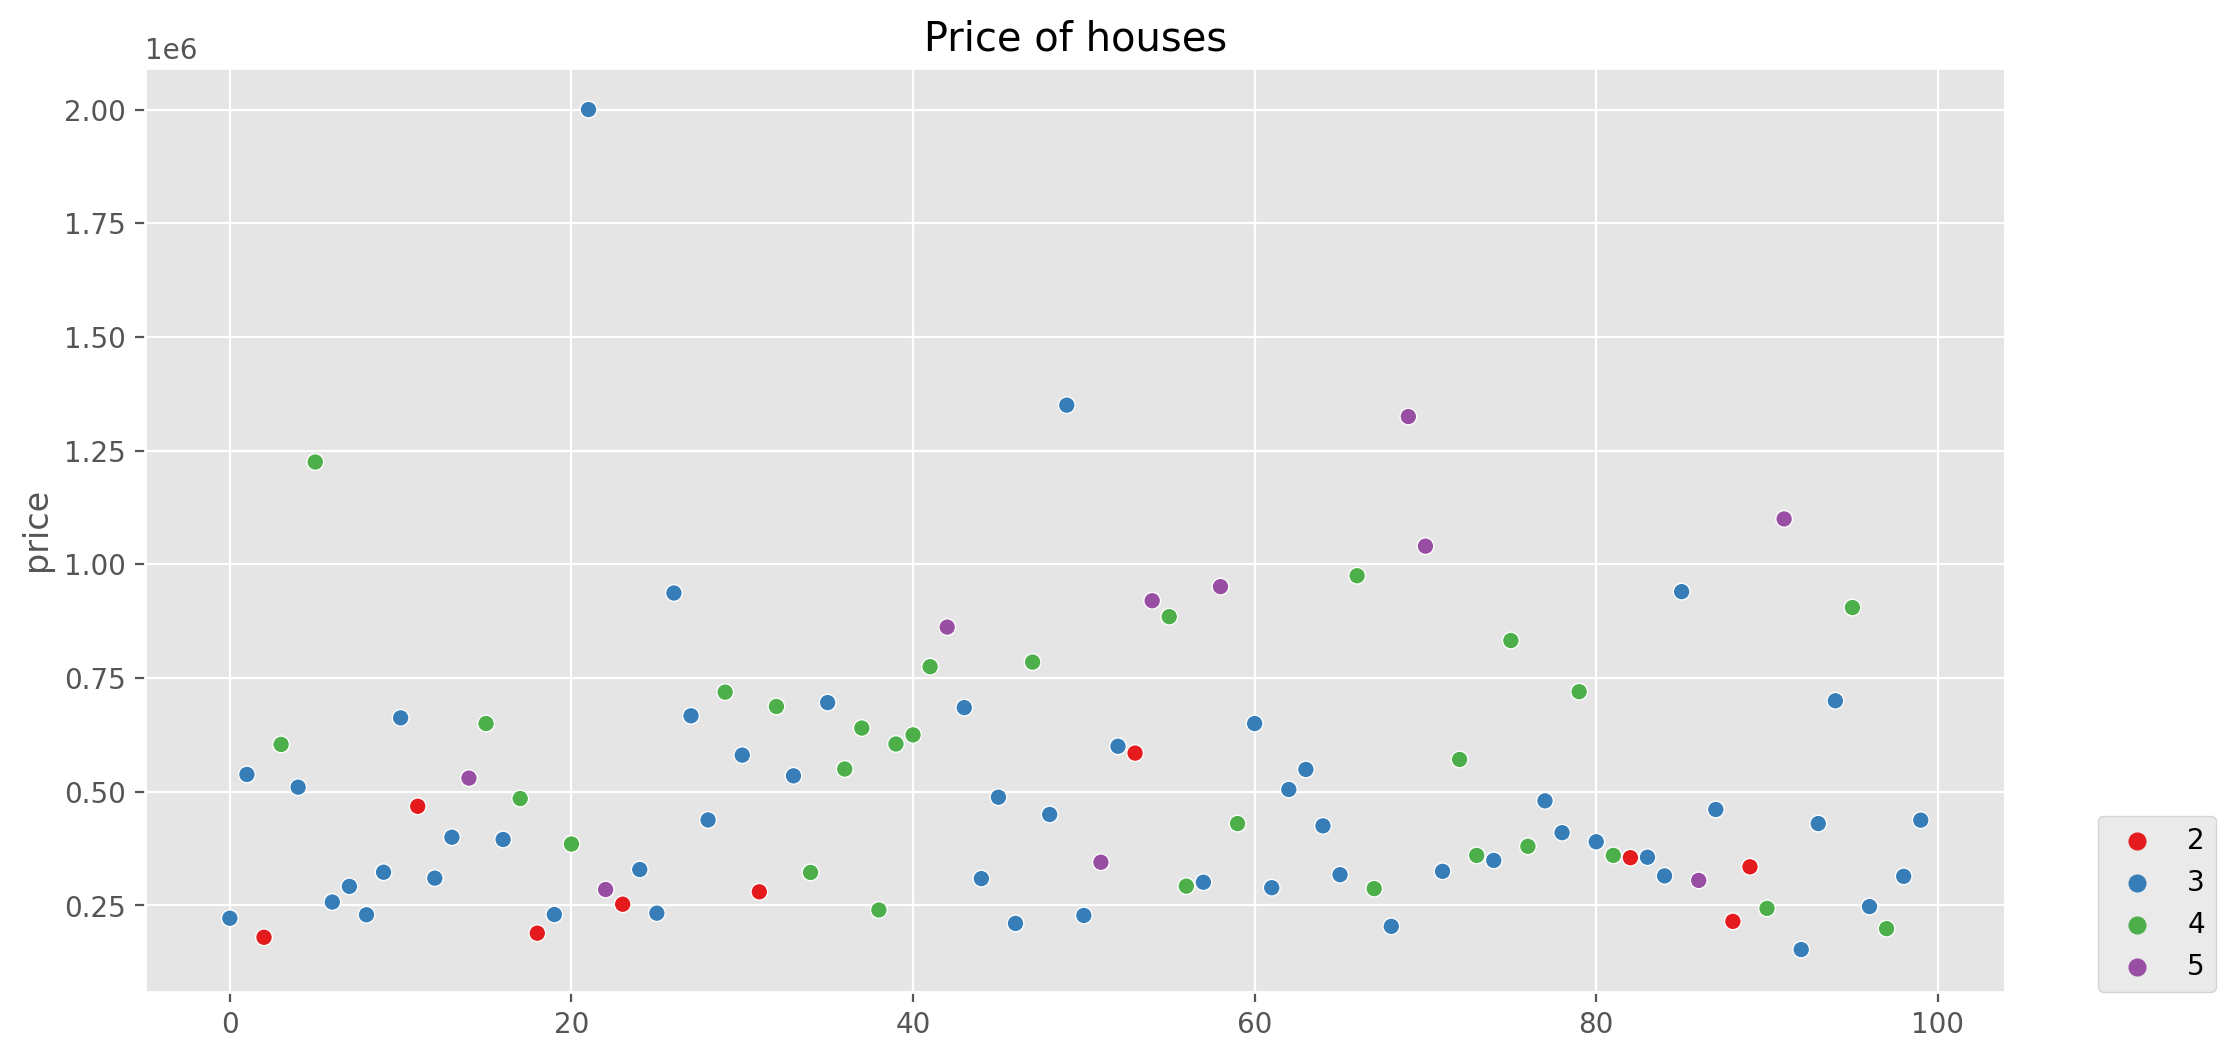

In [23]:
subset_data = data.iloc[:100]

plt.figure(figsize=(12, 6), dpi=200)

# Scatterplot
sns.scatterplot(x=subset_data.index, y=subset_data['price'], hue=subset_data['bedrooms'], palette='Set1')
plt.title('Price of houses')
plt.legend(loc=(1.05, 0))

plt.show()

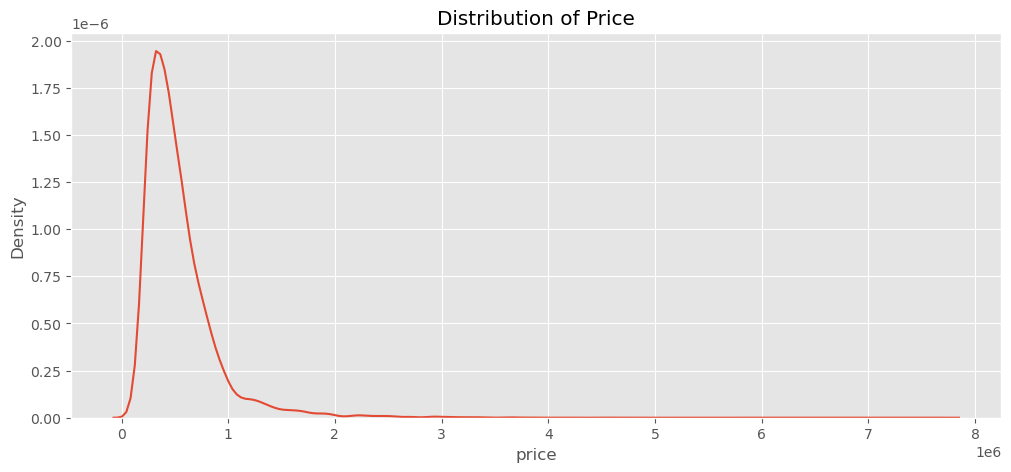

In [24]:
# Distribution plot
plt.figure(figsize=(12, 5))  # Corrected figsize parameter
sns.distplot(data['price'], hist = False)
plt.title('Distribution of Price')

plt.show()

<Axes: xlabel='grade', ylabel='bedrooms'>

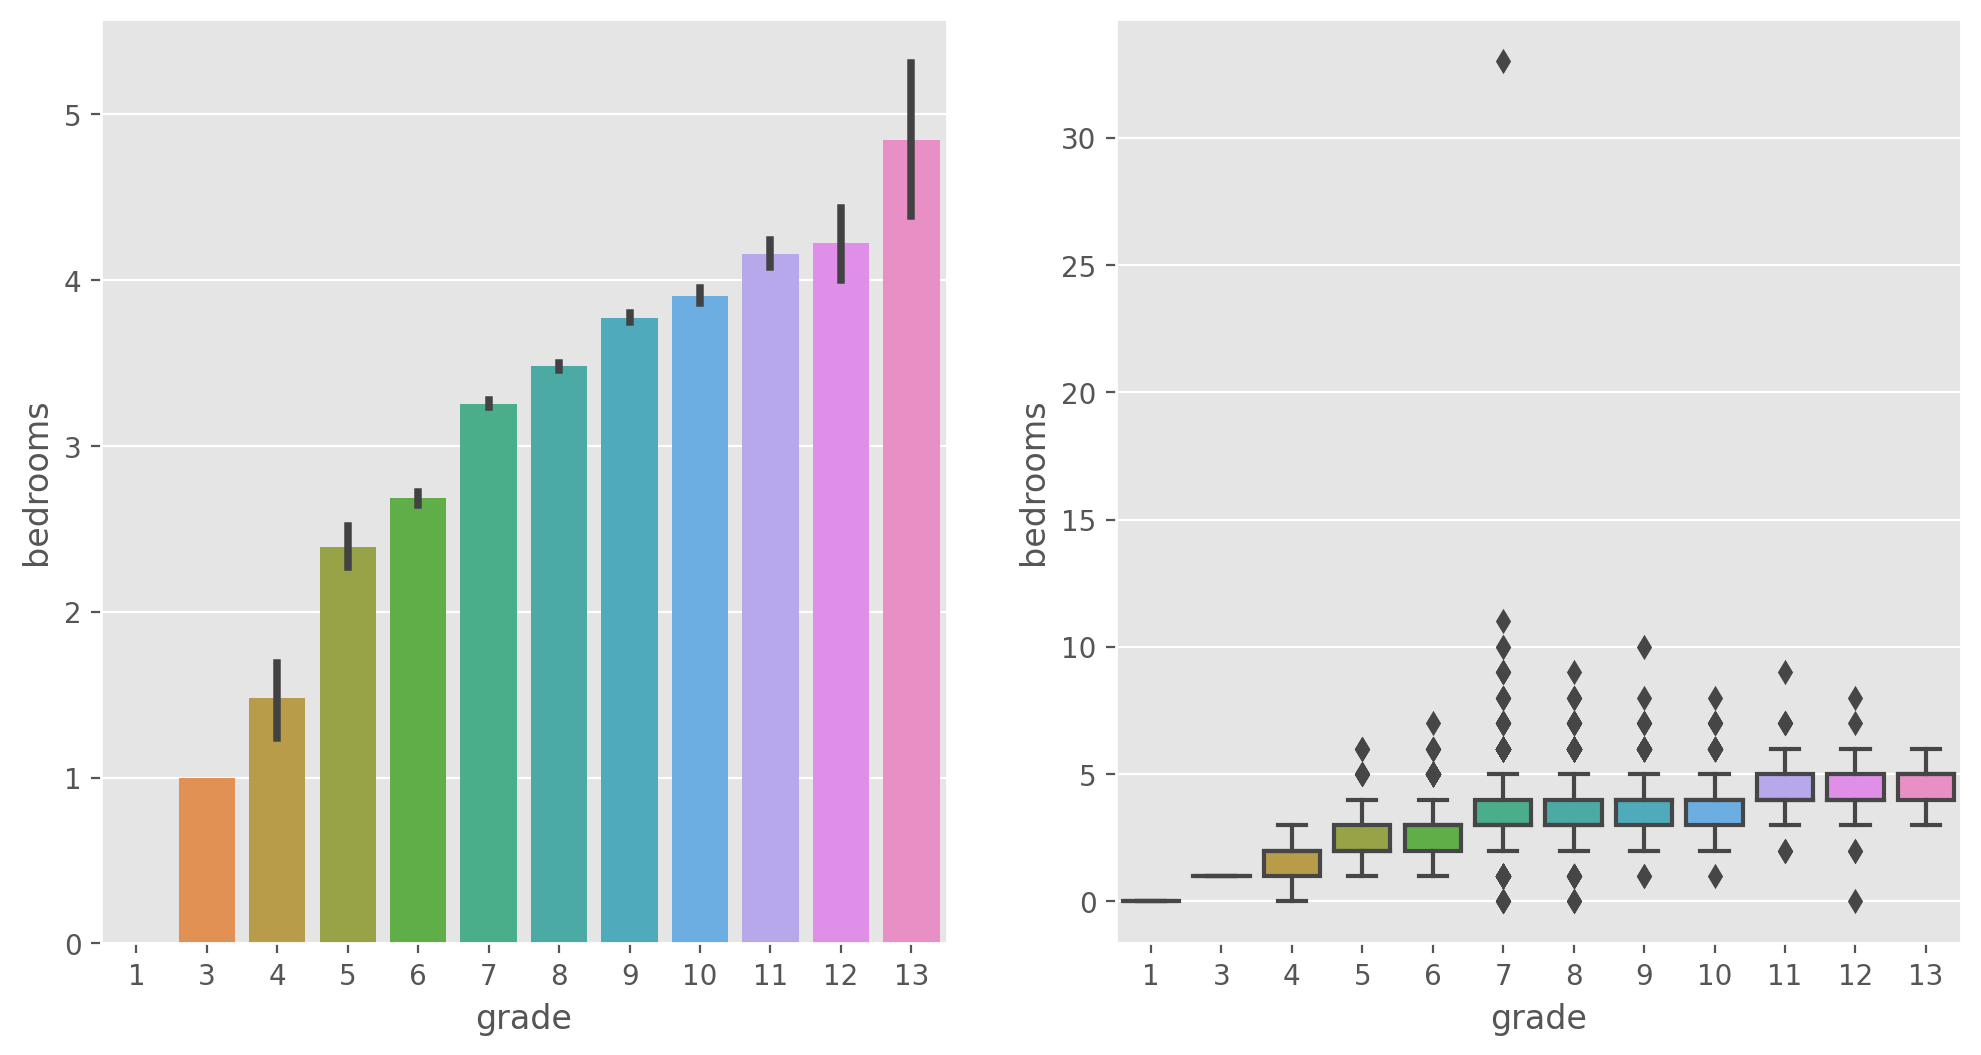

In [25]:
plt.figure(figsize = (12,6), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(y='bedrooms', x="grade", data = data)
plt.subplot(1,2,2)
sns.boxplot(y='bedrooms', x="grade", data = data)

Here if no of bedrooms increases then grade also increases. both are in direct propotion

<Axes: xlabel='condition', ylabel='floors'>

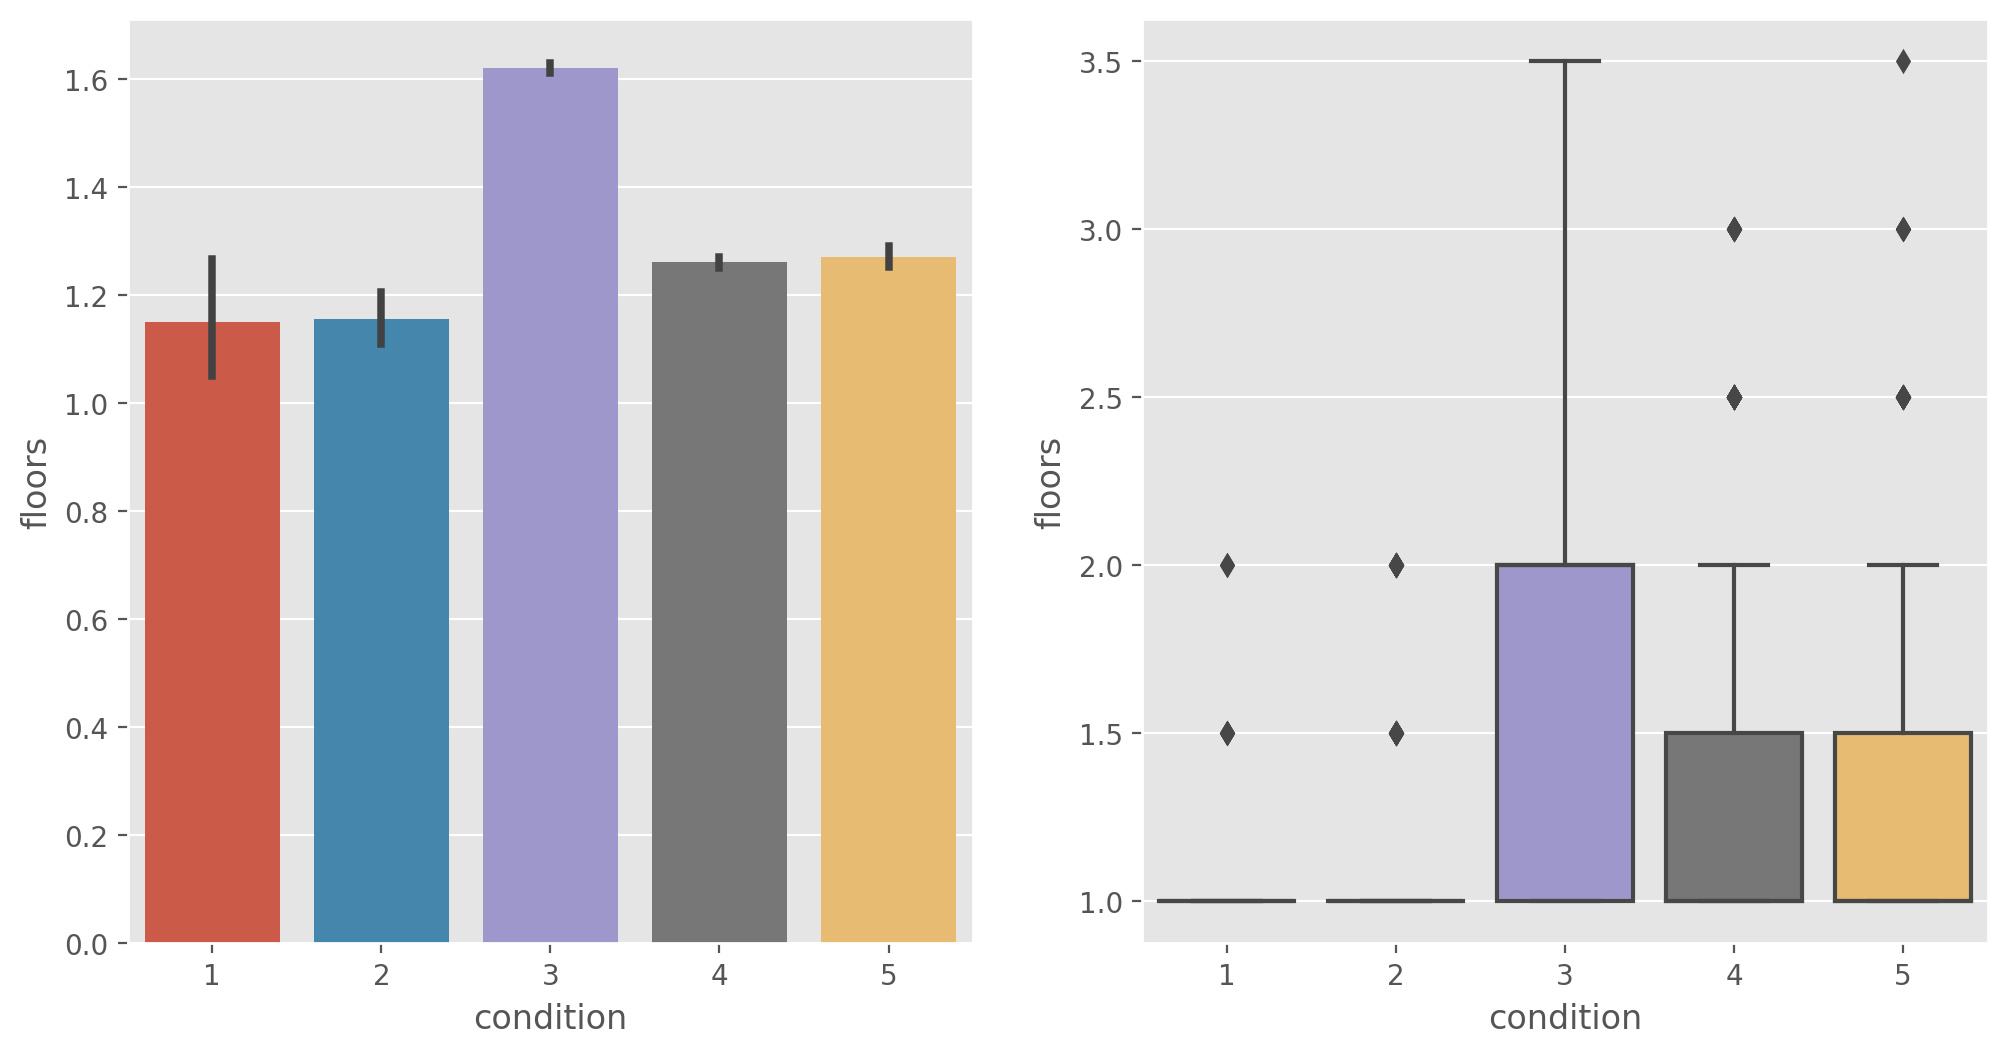

In [26]:
plt.figure(figsize = (12,6), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(y='floors', x="condition", data = data)
plt.subplot(1,2,2)
sns.boxplot(y='floors', x="condition", data = data)

Here  if no of bedrooms increases then grade also increases. both are in same position

In [27]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='bedrooms', ylabel='price'>

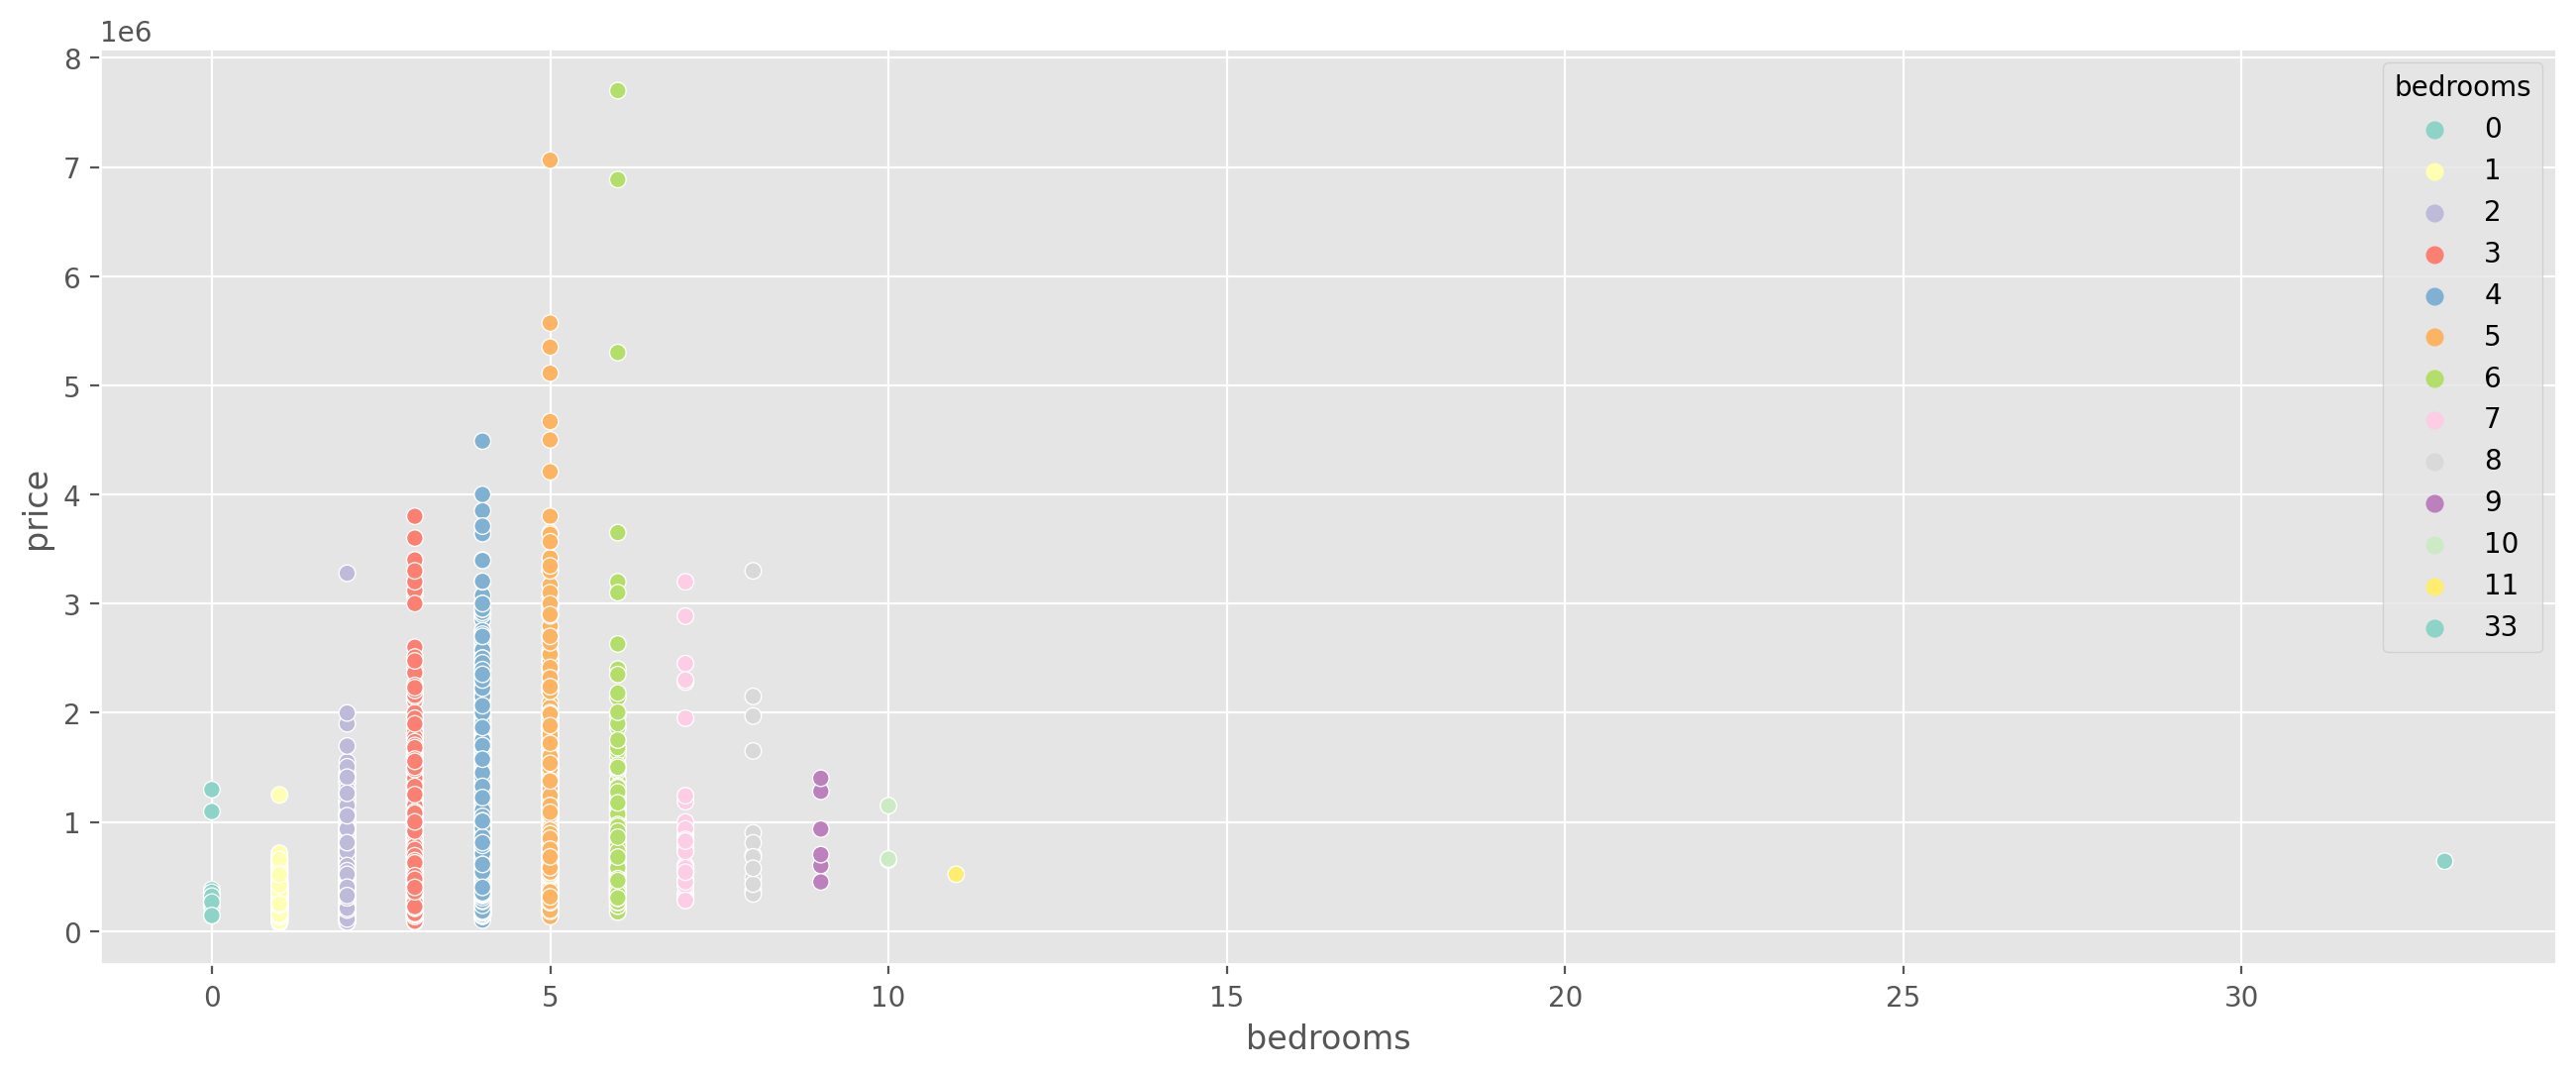

In [33]:
plt.figure(figsize = (16,6), dpi = 200)
sns.scatterplot(x='bedrooms', y='price',hue='bedrooms', data= data, palette = 'Set3')

yes no of bedrooms affect the price

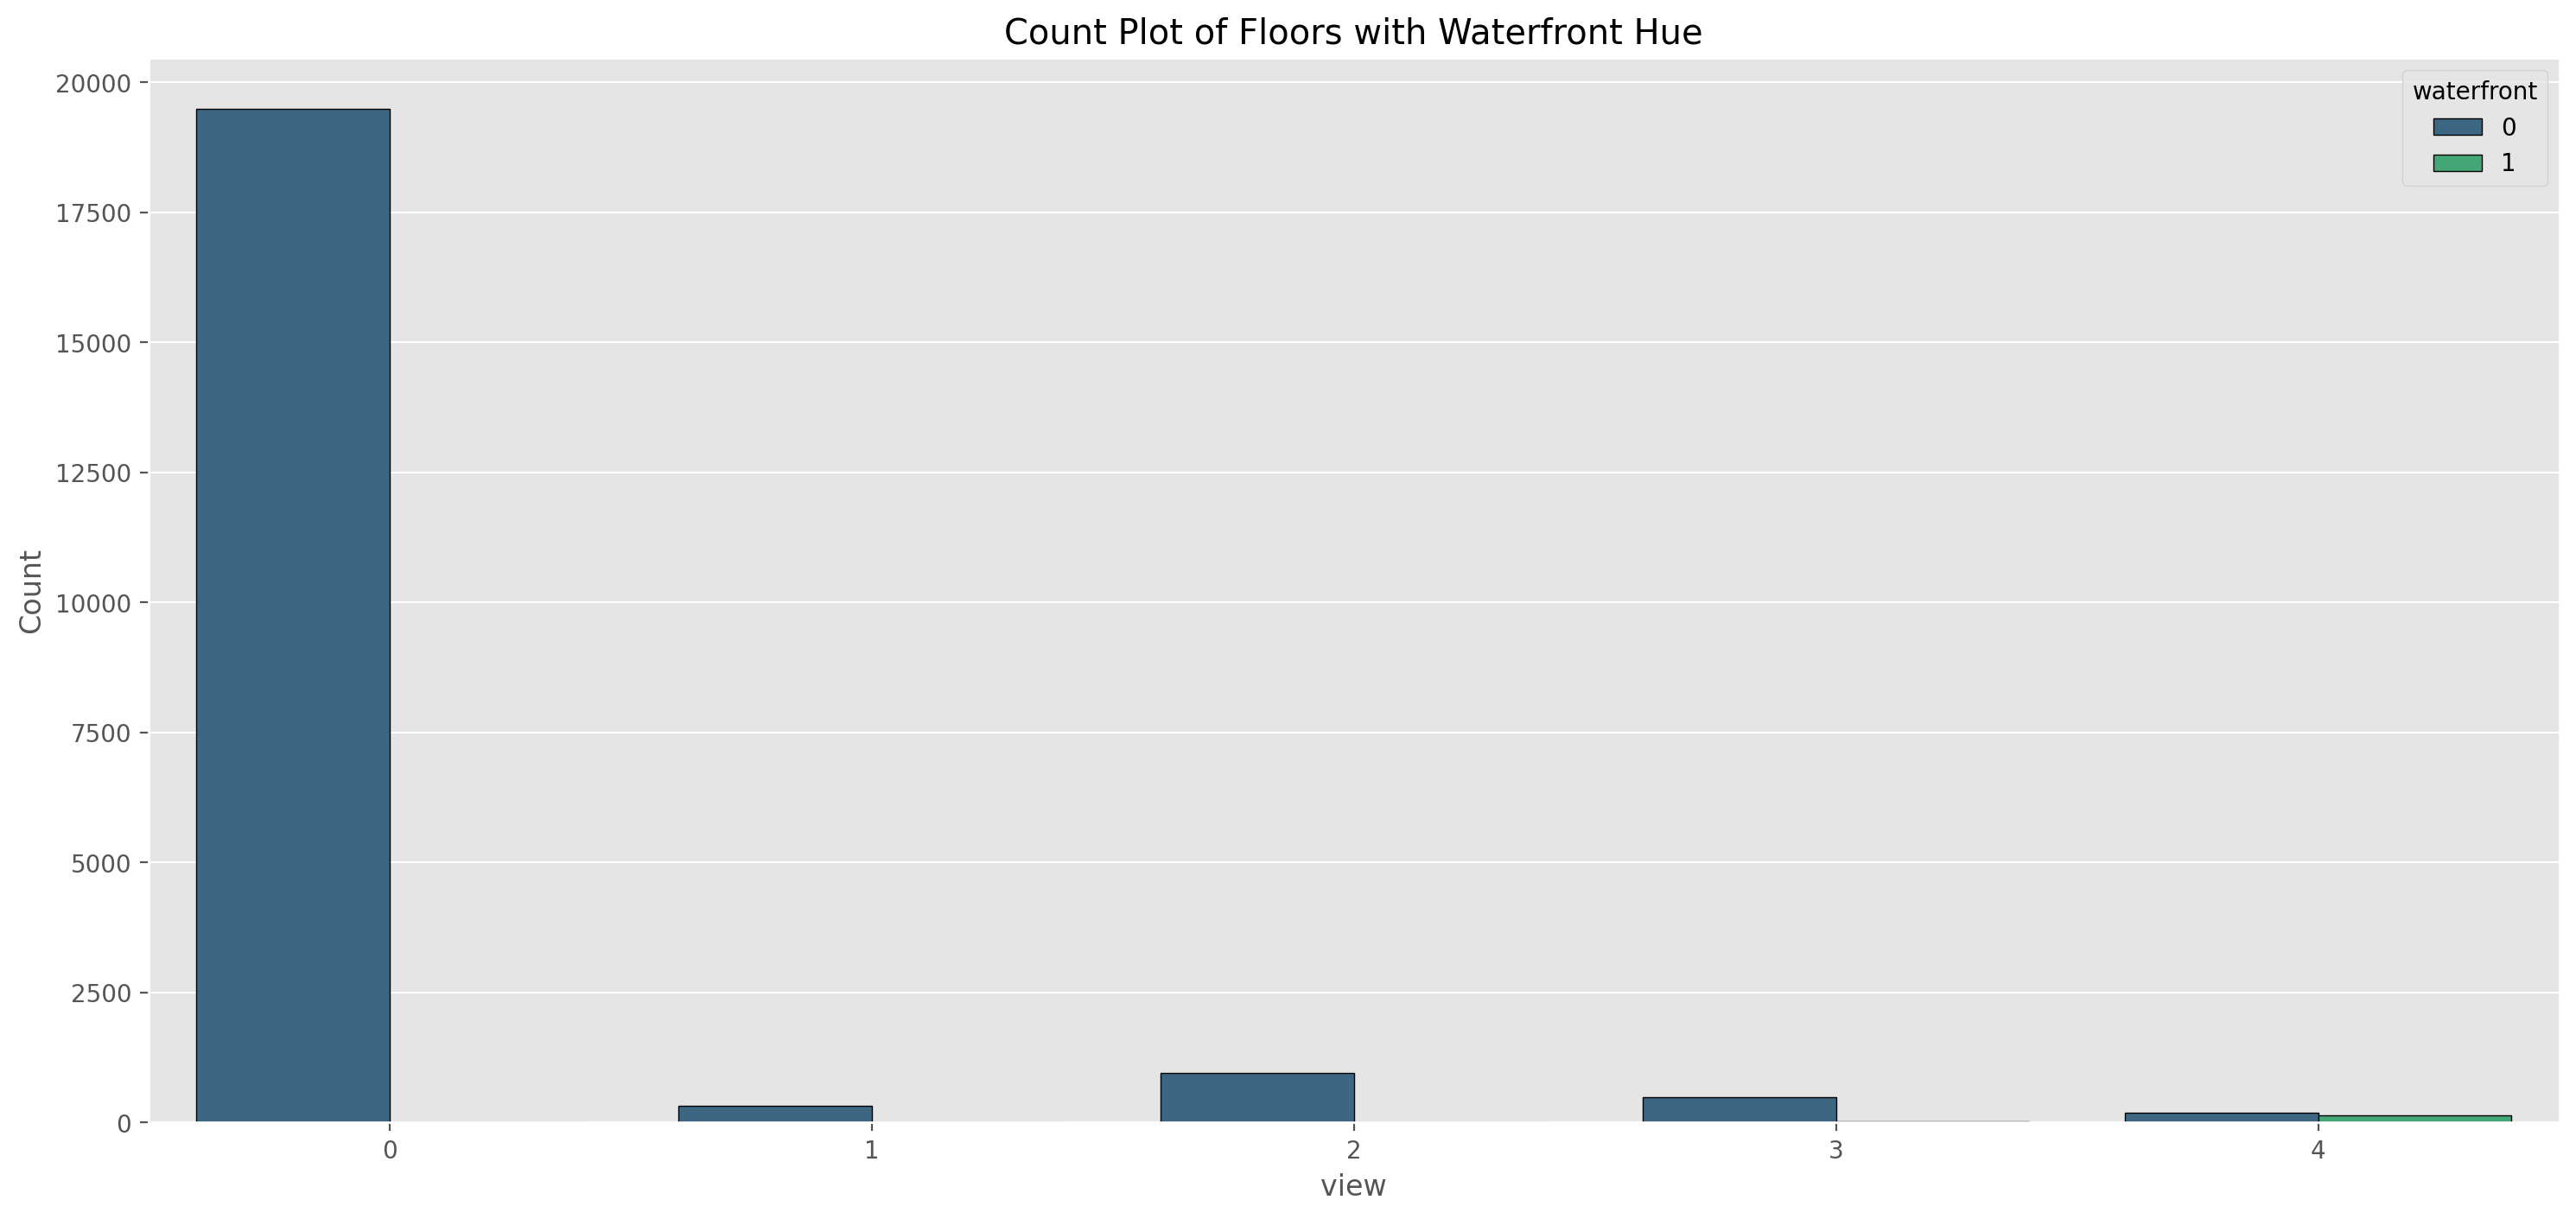

In [29]:


plt.figure(figsize=(18, 8), dpi=200)


sns.countplot(x='view', hue='waterfront', data=data, palette='viridis', edgecolor='black')

plt.title('Count Plot of Floors with Waterfront Hue')
plt.xlabel('view')
plt.ylabel('Count')

plt.show()


<Axes: >

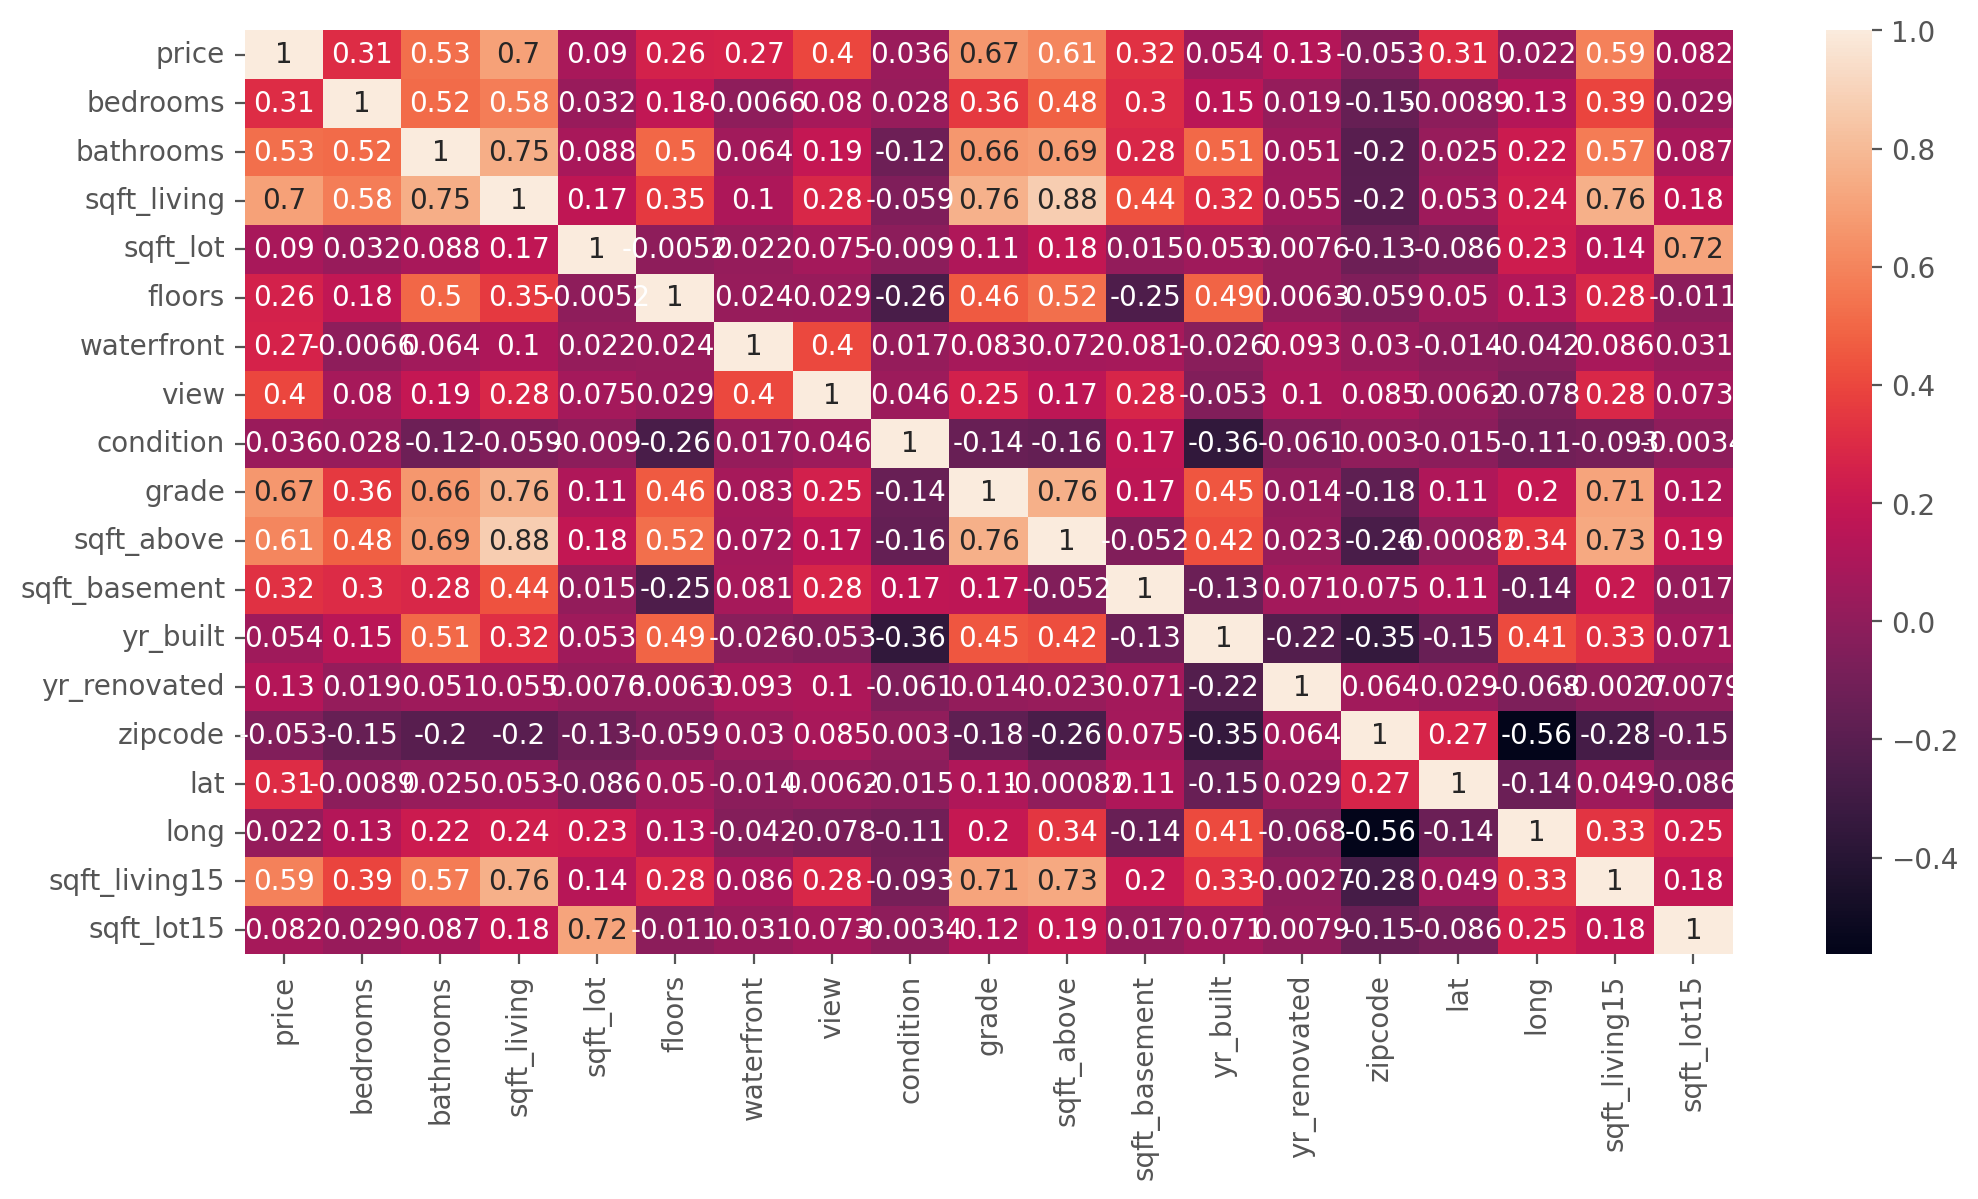

In [30]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
plt.figure(figsize = (12,6), dpi = 200)
sns.heatmap(data[cols].corr(), annot = True)

In [31]:
cols = [ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'sqft_living15', 'sqft_lot15']
X = data[cols]        # Independent Feature Set
Y = data[['price']]   # Depedent Feature

In [32]:
X.head(10)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   
5         4       4.50         5420    101930     1.0           0     0   
6         3       2.25         1715      6819     2.0           0     0   
7         3       1.50         1060      9711     1.0           0     0   
8         3       1.00         1780      7470     1.0           0     0   
9         3       2.50         1890      6560     2.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   
5          3     11        3890           1530      2001             0   
6          3      7        1715              0      1995             0   
7          3      7        1060              0      1963             0   
8          3      7        1050            730      1960             0   
9          3      7        1890              0      2003             0   

   zipcode      lat  sqft_living15  sqft_lot15  
0    98178  47.5112           1340        5650  
1    98125  47.7210           1690        7639  
2    98028  47.7379           2720        8062  
3    98136  47.5208           1360        5000  
4    98074  47.6168           1800        7503  
5    98053  47.6561           4760      101930  
6    98003  47.3097           2238        6819  
7    98198  47.4095           1650        9711  
8    98146  47.5123           1780        8113  
9    98038  47.3684           2390        7570

In [33]:
Y.head(10)

price
0   221900.0
1   538000.0
2   180000.0
3   604000.0
4   510000.0
5  1225000.0
6   257500.0
7   291850.0
8   229500.0
9   323000.0

In [34]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape)

Independent Feature Set Shape :  (21613, 17)
Dependent Feature Shape       :  (21613, 1)


In [35]:
# Splitting The Data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [36]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (17290, 17)
Training Labels Shape :  (17290, 1)
Testing Data Shape    :  (4323, 17)
Testing Labels Shape  :  (4323, 1)


In [37]:
from sklearn.preprocessing import LabelEncoder

cols = ['bedrooms','bathrooms','floors', 'waterfront', 'view', 'condition', 'grade']

# Create a dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply label encoding for each column in the training set
for col in cols:
    label_encoder = LabelEncoder()
    x_train[col] = label_encoder.fit_transform(x_train[col].astype('category'))
    label_encoders[col] = label_encoder

# Apply label encoding for each column in the testing set
for col in cols:
    if col in label_encoders:
        x_test[col] = x_test[col].map(lambda s: label_encoders[col].transform([s])[0] if s in label_encoders[col].classes_ else -1)

# Ensure that all columns are of integer type
x_train[cols] = x_train[cols].astype(int)
x_test[cols] = x_test[cols].astype(int)


In [38]:
x_train.head(10)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
15166         4         15         3860     67953       2           0     2   
13416         4          7         1920      7803       0           0     0   
206           3          9         2440      4587       2           0     0   
4286          3         10         1910     15508       0           0     0   
18065         4          9         2130      9100       0           0     0   
19714         4          9         2420      5006       2           0     0   
15312         3          6         1390      7700       0           0     0   
6293          3          6         1090      7647       0           0     0   
16265         5          3         2550      4623       3           0     0   
466           3          6         1480      6360       0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
15166          3      9        3860              0      1927             0   
13416          2      4        1080            840      1962             0   
206            2      5        2440              0      2010             0   
4286           2      5        1210            700      1984             0   
18065          2      5        1290            840      1978             0   
19714          2      5        2420              0      2013             0   
15312          4      4        1390              0      1965             0   
6293           2      4        1090              0      1994             0   
16265          3      6        2550              0      1905             0   
466            2      4        1480              0      1954             0   

       zipcode      lat  sqft_living15  sqft_lot15  
15166    98177  47.7469           4410      128066  
13416    98155  47.7580           1940        8147  
206      98052  47.7073           2750        4587  
4286     98023  47.3128           2450        7989  
18065    98030  47.3815           1770        7700  
19714    98059  47.4795           2750        5471  
15312    98058  47.4559           1260        7700  
6293     98003  47.2613           1660        9219  
16265    98122  47.6092           1570        3875  
466      98133  47.7311           1480        6360

In [39]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [40]:
# Scaling
cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'sqft_living15', 'sqft_lot15']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit on training set
scaler.fit(x_train[cols])

# Tranform training and testing sets
x_train[cols] = scaler.transform(x_train[cols])
x_test[cols]  = scaler.transform(x_test[cols])

In [41]:
x_train.head(10)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
15166  0.333333   0.517241     0.298801  0.057918     0.4         0.0   0.5   
13416  0.333333   0.241379     0.132705  0.006255     0.0         0.0   0.0   
206    0.250000   0.310345     0.177226  0.003493     0.4         0.0   0.0   
4286   0.250000   0.344828     0.131849  0.012873     0.0         0.0   0.0   
18065  0.333333   0.310345     0.150685  0.007369     0.0         0.0   0.0   
19714  0.333333   0.310345     0.175514  0.003853     0.4         0.0   0.0   
15312  0.250000   0.206897     0.087329  0.006167     0.0         0.0   0.0   
6293   0.250000   0.206897     0.061644  0.006121     0.0         0.0   0.0   
16265  0.416667   0.103448     0.186644  0.003524     0.6         0.0   0.0   
466    0.250000   0.206897     0.095034  0.005016     0.0         0.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
15166       0.75    0.9    0.411072       0.000000  0.234783           0.0   
13416       0.50    0.4    0.083628       0.174274  0.539130           0.0   
206         0.50    0.5    0.243816       0.000000  0.956522           0.0   
4286        0.50    0.5    0.098940       0.145228  0.730435           0.0   
18065       0.50    0.5    0.108363       0.174274  0.678261           0.0   
19714       0.50    0.5    0.241461       0.000000  0.982609           0.0   
15312       1.00    0.4    0.120141       0.000000  0.565217           0.0   
6293        0.50    0.4    0.084806       0.000000  0.817391           0.0   
16265       0.75    0.6    0.256773       0.000000  0.043478           0.0   
466         0.50    0.4    0.130742       0.000000  0.469565           0.0   

        zipcode       lat  sqft_living15  sqft_lot15  
15166  0.888889  0.950619       0.690243    0.146354  
13416  0.777778  0.968474       0.265187    0.008602  
206    0.257576  0.886923       0.404578    0.004512  
4286   0.111111  0.252373       0.352951    0.008420  
18065  0.146465  0.362876       0.235932    0.008088  
19714  0.292929  0.520508       0.404578    0.005528  
15312  0.287879  0.482548       0.148167    0.008088  
6293   0.010101  0.169535       0.217002    0.009833  
16265  0.611111  0.729130       0.201514    0.003694  
466    0.666667  0.925205       0.186027    0.006549

In [42]:
x_test.head(10)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6638   0.333333   0.275862     0.174658  0.003204     0.2         0.0   0.0   
7366   0.250000   0.172414     0.154110  0.013811     0.0         1.0   0.5   
3158   0.166667   0.103448     0.092466  0.005033     0.0         0.0   0.0   
9117   0.416667   0.413793     0.353596  0.007840     0.4         0.0   1.0   
3392   0.166667   0.103448     0.041952  0.004707     0.0         0.0   0.0   
305    0.250000   0.206897     0.132705  0.002388     0.0         0.0   0.0   
14462  0.250000   0.172414     0.182363  0.004707     0.2         0.0   0.0   
6196   0.333333   0.275862     0.172089  0.029622     0.0         0.0   0.0   
10194  0.333333   0.310345     0.167808  0.008081     0.4         0.0   0.0   
13457  0.250000   0.379310     0.154966  0.001829     0.2         0.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
6638        1.00    0.4    0.128386       0.197095  0.252174      0.000000   
7366        0.50    0.7    0.089517       0.215768  0.686957      0.000000   
3158        0.50    0.4    0.127208       0.000000  0.582609      0.000000   
9117        0.75    0.5    0.309776       0.311203  0.591304      0.000000   
3392        0.50    0.3    0.057715       0.000000  0.391304      0.000000   
305         0.75    0.5    0.069494       0.199170  0.113043      0.000000   
14462       1.00    0.4    0.160188       0.159751  0.356522      0.984615   
6196        0.50    0.5    0.236749       0.000000  0.669565      0.000000   
10194       0.50    0.5    0.230860       0.000000  0.852174      0.000000   
13457       1.00    0.5    0.122497       0.159751  0.260870      0.000000   

        zipcode       lat  sqft_living15  sqft_lot15  
6638   0.585859  0.850893       0.165376    0.005072  
7366   0.257576  0.763712       0.469971    0.015181  
3158   0.575758  0.862956       0.144726    0.006572  
9117   0.626263  0.917323       0.409740    0.023518  
3392   0.106061  0.088467       0.155051    0.006135  
305    0.560606  0.752775       0.230769    0.003838  
14462  0.530303  0.601255       0.161934    0.004987  
6196   0.373737  0.687631       0.318534    0.039211  
10194  0.222222  0.527103       0.349510    0.008634  
13457  0.585859  0.857648       0.201514    0.004780

In [43]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 20)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [44]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.7813080666015904
Testing Set Score  :  0.7708436855578965


In [45]:
# Ordinary Least Squares (OLS)
from sklearn.linear_model import LinearRegression           # Import the class
regressor = LinearRegression()                              # Create an object
regressor.fit(x_train, y_train)                             # Fit the object to training data

LinearRegression()

In [46]:
regressor.intercept_

array([-279794.51619721])

In [47]:
regressor.coef_

array([[-472229.87917678,  295496.86975485,  845486.89842715,
          35199.18719866,   35346.67086867,  576728.71935623,
         211205.54530842,  107407.96265936,  992140.85594445,
         909268.03065773,  447220.20608817, -331335.84433436,
          43788.24034461,  -73318.54379384,  370161.4852581 ,
          71120.46275576, -377991.12693489]])

In [48]:
# Evaluation
print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.6921248148073782
Testing Set Score  :  0.7123203632292451


In [49]:
# The r2_score function
from sklearn.metrics import r2_score

pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.6921248148073782
Testing Set Score  :  0.7123203632292451


In [50]:
# Gradient Descent method
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(alpha = 5)
sgd_regressor.fit(x_train, y_train)

SGDRegressor(alpha=5)

In [51]:
sgd_regressor.intercept_          # B0

array([528589.81702398])

In [52]:
sgd_regressor.coef_               # B1

array([ 1678.94831975,  4119.74070648,  4101.03804985,   233.11460719,
        3606.88167291,  1640.3758434 ,  4560.22762678,   491.23573085,
        5544.77809465,  4270.44054955,  2415.78509473,  1804.40313405,
         899.40535413, -1346.07557669,  5132.17778346,  4925.54577407,
         109.96490269])

In [53]:
# Evaluation
print('Training Set Score : ', sgd_regressor.score(x_train, y_train))
print('Testing Set Score  : ', sgd_regressor.score(x_test, y_test))

Training Set Score :  0.013998537464568361
Testing Set Score  :  0.014299499900483514


In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [55]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)


126425.87901382768

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test)

40162436003.075424

In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test, squared = False) #RMSE

200405.6785699333

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_test)

0.7123203632292451

In [60]:
regressor.score(x_test, y_test)

0.7123203632292451

In [61]:
from sklearn.linear_model import Lasso                               # Regression with L1 Regularization
regressor = Lasso(alpha = 1)                                         # alpha : regularization parameter
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.6921247470902994
Testing set score  :  0.7123110368522887


In [62]:
from sklearn.linear_model import Ridge                               # Regression with L2 Regularization
regressor = Ridge(alpha = 3)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.6919519277819932
Testing set score  :  0.7121816926470967


In [63]:
from sklearn.linear_model import ElasticNet                               # Regression with L1 and L2 Regularization
regressor = ElasticNet(alpha = 3)
regressor.fit(x_train, y_train)

print('Training set score : ', regressor.score(x_train, y_train))
print('Testing set score  : ', regressor.score(x_test, y_test))

Training set score :  0.045666492415203486
Testing set score  :  0.046553652529630396


In [64]:
regressor.predict(x_test[:1])

array([538713.64212743])

In [65]:
regressor.predict(x_test[:10])

array([538713.64212743, 558369.76991953, 530645.28695638, 573776.55857182,
       516020.42017326, 534185.44381772, 539838.35282445, 539009.06912157,
       543148.52863318, 541520.36708964])

In [66]:
regressor.predict(x_test[:10]).max()

573776.5585718239

In [67]:
regressor.predict(x_test[:10]).min()

516020.42017326405